<a href="https://colab.research.google.com/github/sarabert96/Colexification/blob/main/06_Analysis_Bootstrapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pickle
import pandas as pd

In [2]:
!gdown --id 1tu36NAL3MyHMkajE7wEDffbF0OI5fidY #listBoot
# bootstrappping with 100 as number of cicle

Downloading...
From: https://drive.google.com/uc?id=1tu36NAL3MyHMkajE7wEDffbF0OI5fidY
To: /content/listBoot.txt
222MB [00:03, 59.2MB/s]


In [3]:
with open("listBoot.txt", "rb") as fp:   # Unpickling
  lBoot = pickle.load(fp)

In [5]:
df_colex_prob = pd.DataFrame(lBoot[0], columns=['Colex_pair','Concept1', 'Concept2', 'Prob']) # to save in df


In [6]:
df_colex_prob['Prob'].describe()

count    42549.000000
mean         0.001820
std          0.006200
min          0.000016
25%          0.000042
50%          0.000100
75%          0.000718
max          0.196057
Name: Prob, dtype: float64

Since the values are very low, we modify them to improve performances on computation (only for this phase).

In [7]:
df_colex_prob['Prob']=df_colex_prob['Prob']*100

In [8]:
df_colex_prob['Prob'] = round(df_colex_prob['Prob'], 3)

In [9]:
df_colex_prob['Prob'].describe()

count    42549.000000
mean         0.181823
std          0.620015
min          0.002000
25%          0.004000
50%          0.010000
75%          0.072000
max         19.606000
Name: Prob, dtype: float64

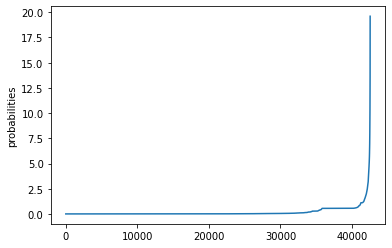

In [10]:
import matplotlib.pyplot as plt
plt.plot(sorted(list(df_colex_prob['Prob'])))
plt.ylabel('probabilities')
plt.show()

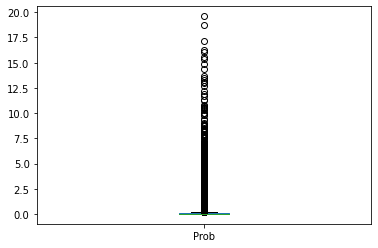

In [11]:
ax = df_colex_prob.plot.box()

histogram with 5% fasce

In [14]:
import matplotlib.pyplot as plt

In [16]:
data = df_colex_prob['Prob']

(array([4.1999e+04, 3.3300e+02, 1.2400e+02, 3.8000e+01, 2.3000e+01,
        1.5000e+01, 8.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([2.00000e-03, 1.96240e+00, 3.92280e+00, 5.88320e+00, 7.84360e+00,
        9.80400e+00, 1.17644e+01, 1.37248e+01, 1.56852e+01, 1.76456e+01,
        1.96060e+01]),
 <a list of 10 Patch objects>)

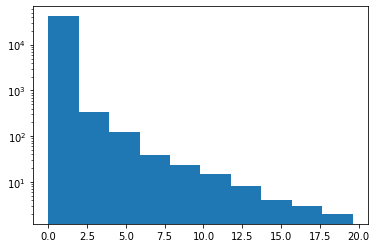

In [17]:
plt.hist(data, log = True)

In [18]:
# code by https://towardsdatascience.com/advanced-histogram-using-python-bceae288e715

def smartHist (data):
  import matplotlib.pyplot as plt
  from matplotlib.patches import Rectangle
  import numpy as np

  # Take data
  #data = df_colex_prob['Prob']

  # Plot the Histogram from the data
  fig, ax = plt.subplots(figsize=(8, 8))

  '''
  counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
  bins    = numpy.ndarray of bin edge/range values
  patches = a list of Patch objects.
          each Patch object contains a Rectnagle object. 
          e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
  '''
  counts, bins, patches = ax.hist(data, edgecolor='gray', log = True)


  # Set the ticks to be at the edges of the bins.
  ax.set_xticks(bins.round(2))
  plt.xticks(rotation=70)

  # Set the graph title and axes titles
  plt.title('Distribution of probabilities', fontsize=20)
  plt.ylabel('Count', fontsize=15)
  plt.xlabel('Probabilities', fontsize=15)
          
  # Calculate bar centre to display the count of data points and %
  #bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
  #bin_y_centers = ax.get_yticks()[1] * 0.25
  bin_x_centers = 0.75 * np.diff(bins) + bins[:-1]
  bin_y_centers = ax.get_yticks()[1] * 5

  # Display the the count of data points and % for each bar in histogram
  for i in range(len(bins)-1):
      bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
      plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

  # Display the graph
  plt.show()

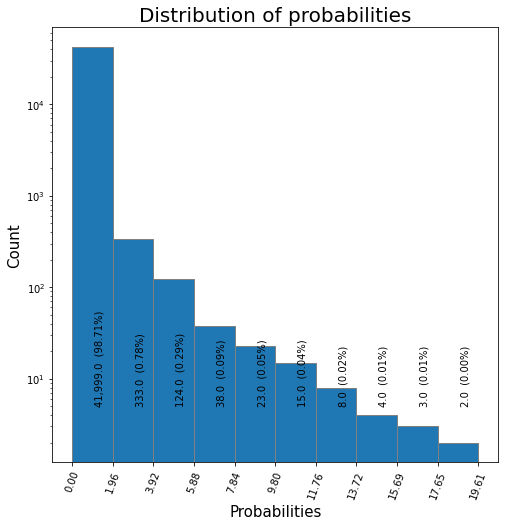

In [19]:
smartHist (df_colex_prob['Prob'])

Check visually whether to take 5 or 2%

In [21]:
df_colex_prob1 = pd.DataFrame(lBoot[1], columns=['Colex_pair', 'Concept1', 'Concept2', 'Prob']) # to save in df
df_colex_prob1['Prob']=df_colex_prob1['Prob']*100
df_colex_prob1['Prob'] = round(df_colex_prob1['Prob'], 3)

df_colex_prob2 = pd.DataFrame(lBoot[2], columns=['Colex_pair', 'Concept1', 'Concept2', 'Prob']) # to save in df
df_colex_prob2['Prob']=df_colex_prob2['Prob']*100
df_colex_prob2['Prob'] = round(df_colex_prob2['Prob'], 3)

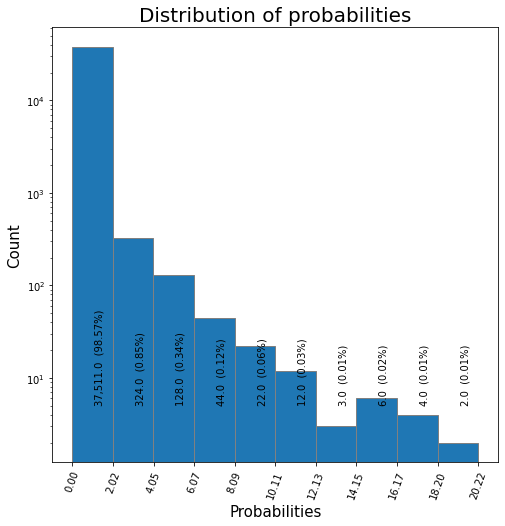

In [22]:
smartHist (df_colex_prob1['Prob'])

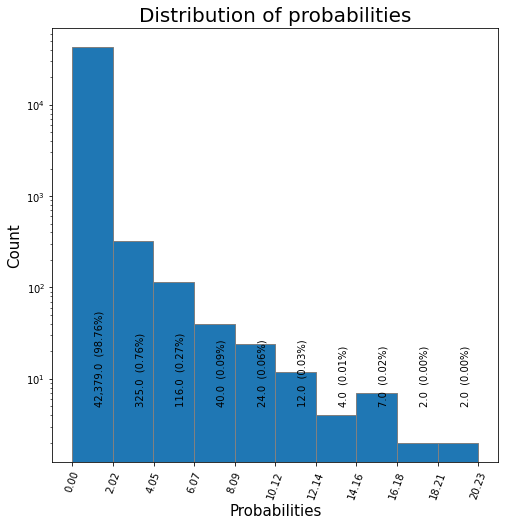

In [23]:
smartHist (df_colex_prob2['Prob'])

Downloading the dataframe with the cosine values obtained from the original colexifications dataframe

In [24]:
!gdown --id 1vTgCbYTHUpEmKPfB8asRYCe-olek65i0 #df_colex_cosines

Downloading...
From: https://drive.google.com/uc?id=1vTgCbYTHUpEmKPfB8asRYCe-olek65i0
To: /content/df_colex_cosines.csv
13.4MB [00:00, 62.5MB/s]


In [25]:
df_cosine = pd.read_csv('df_colex_cosines.csv')

In [27]:
df_cosine.head(2)

,Unnamed: 0,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
0,0,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,1927,bamboo,0.250825,"('gold', 'bamboo')"
1,1,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,946,blood,0.244084,"('gold', 'blood')"


In [28]:
df_cosine = df_cosine.iloc[: , 1:] # remove the first column

In [29]:
df_cosine[df_cosine['Concepticon_pair']=="('green', 'yellow')"].head(5)
# we see we have more than one row for a single pair

,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
3,dzju,1425,hrus1242,green,Hruso,Hruso Aka Jamiri,1424,yellow,0.682016,"('green', 'yellow')"
9079,madulaw,1425,cala1258,green,Austronesian,Kalamian,1424,yellow,0.682016,"('green', 'yellow')"
9080,mkach,1425,babu1240,green,Austronesian,Favorlang,1424,yellow,0.682016,"('green', 'yellow')"
9081,ghelh3,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"
9082,gheltos,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"


In [30]:
cosines = []
for c in df_colex_prob['Colex_pair']:
  cosines.append(df_cosine[df_cosine['Concepticon_pair']==str(c)].cosine_sim.iloc[0])

In [31]:
len(cosines)

42549

In [32]:
df_colex_prob['Cosine']=cosines # add the cosines to the df

Print the top ten rows depending on the probability

In [33]:
topTenProb = sorted(list(df_colex_prob['Prob']))[-10]

In [34]:
df_colex_prob[df_colex_prob['Prob']>topTenProb]

,Colex_pair,Concept1,Concept2,Prob,Cosine
8949,"(dish, plate)",dish,plate,16.060,0.489088
12227,"(fingernail, claw)",fingernail,claw,14.833,0.430682
12812,"(flesh, meat)",flesh,meat,17.126,0.501161
15185,"(grandson, granddaughter)",grandson,granddaughter,16.299,0.858003
16271,"(hear, listen)",hear,listen,15.574,0.689995
19185,"(language, word)",language,word,15.400,0.437374
21782,"(moon, month)",moon,month,19.606,0.221915
30029,"(sea, ocean)",sea,ocean,14.337,0.775731
38968,"(tree, wood)",tree,wood,18.699,0.400885


Print the top ten rows depending on the cosine similarity

In [35]:
topTenCos = sorted(list(df_colex_prob['Cosine']))[-10]

In [36]:
df_colex_prob[df_colex_prob['Cosine']>topTenCos]

,Colex_pair,Concept1,Concept2,Prob,Cosine
10235,"(east, west)",east,west,0.009,0.965797
12629,"(five, six)",five,six,0.839,0.963688
13481,"(four, three)",four,three,0.572,0.977453
22010,"(mother's brother, father's brother)",mother's brother,father's brother,6.994,0.989379
22030,"(mother's sister, father's sister)",mother's sister,father's sister,5.227,0.989390
23062,"(north, south)",north,south,1.565,0.978717
38224,"(three, four)",three,four,0.868,0.977453
38244,"(three days before now, four days before now)",three days before now,four days before now,0.003,0.997379
39307,"(twenty four, twenty five)",twenty four,twenty five,0.009,0.986251


We see that the pairs don't coincide